## Read The Data

In [1]:
# Import dependencies
import os
import requests
import warnings
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances, silhouette_score, silhouette_samples

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
# Import the dataset from github repo
try:
  # Read the data if it exists
  print("[INFO] The dataset already exists. Skipping download...")
  df = pd.read_csv("wine-clustering.csv")
except:
  # Download the data if it doesn't exist
  print("[INFO] The dataset doesn't exist yet. Downloading it...")
  request = requests.get("https://raw.githubusercontent.com/edatha/assignment_day_8/refs/heads/main/wine-clustering.csv")
  with open("wine-clustering.csv", "wb") as f:
    f.write(request.content)
  df = pd.read_csv("wine-clustering.csv")

[INFO] The dataset already exists. Skipping download...


## Exploratory Data Analysis (EDA)

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 13)

In [5]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.duplicated().sum()

0

There are **no duplicate rows** in the dataset

In [7]:
df.isna().sum().sum()

0

There are **no missing values** in the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [9]:
# Turn int64 features to float64
df["Magnesium"] = df["Magnesium"].astype(float)
df["Proline"] = df["Proline"].astype(float)

Since those two features don't represent counts or categorical data, it would be better to convert them to `float64`, as it is common to use continuous features in most machine learning model scenarios.

### Univariate Analysis

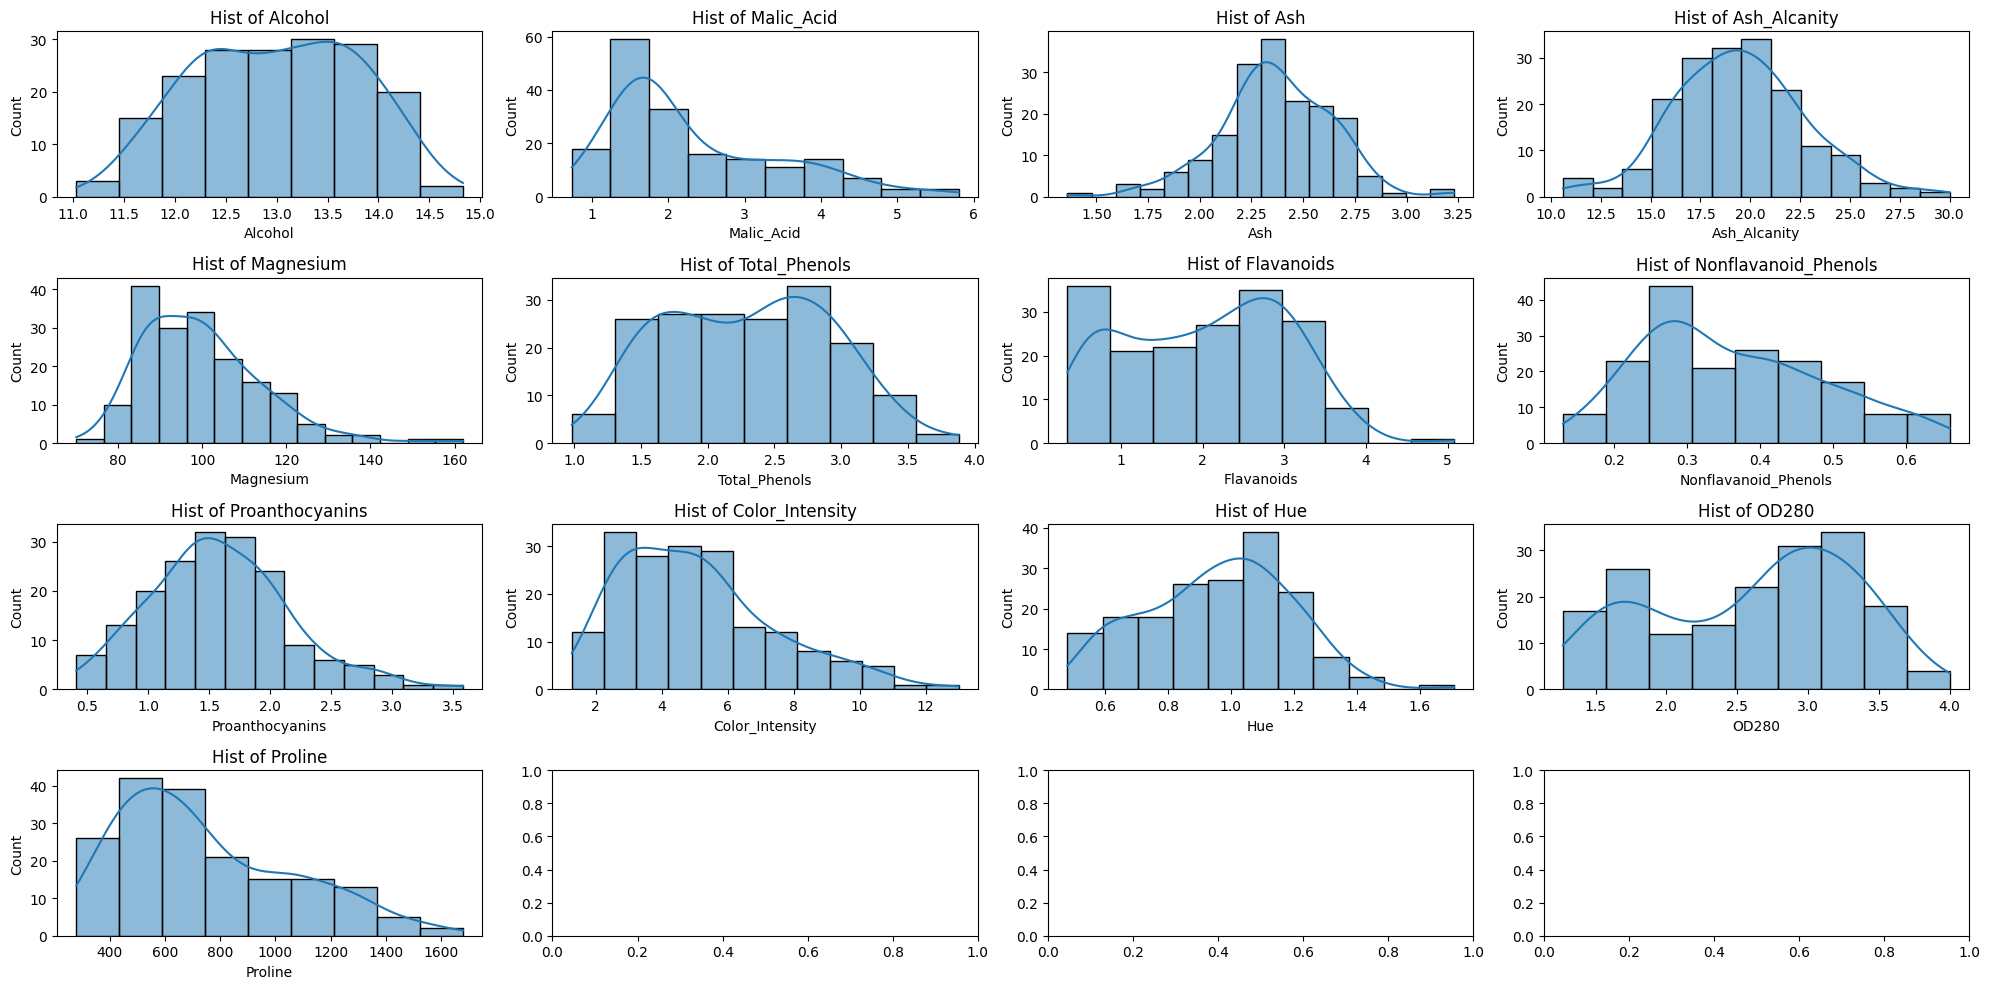

In [10]:
# Visualize

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 10)) # Create a figure and several axes

axes = axes.flatten() # Turn a 2D array into a 1D array for simplification

for i, col in enumerate(df.columns):
  # Create a histogram for all columns
  sns.histplot(data=df, x=col, kde=True, ax=axes[i])
  axes[i].set_title(f"Hist of {col}")

plt.tight_layout()
plt.show()

There are several features that are normally distributed and do not show any outliers. However, there are also some features that show some skewness. Then, let's check whether outliers exist or not because PCA is very sensitive to them.

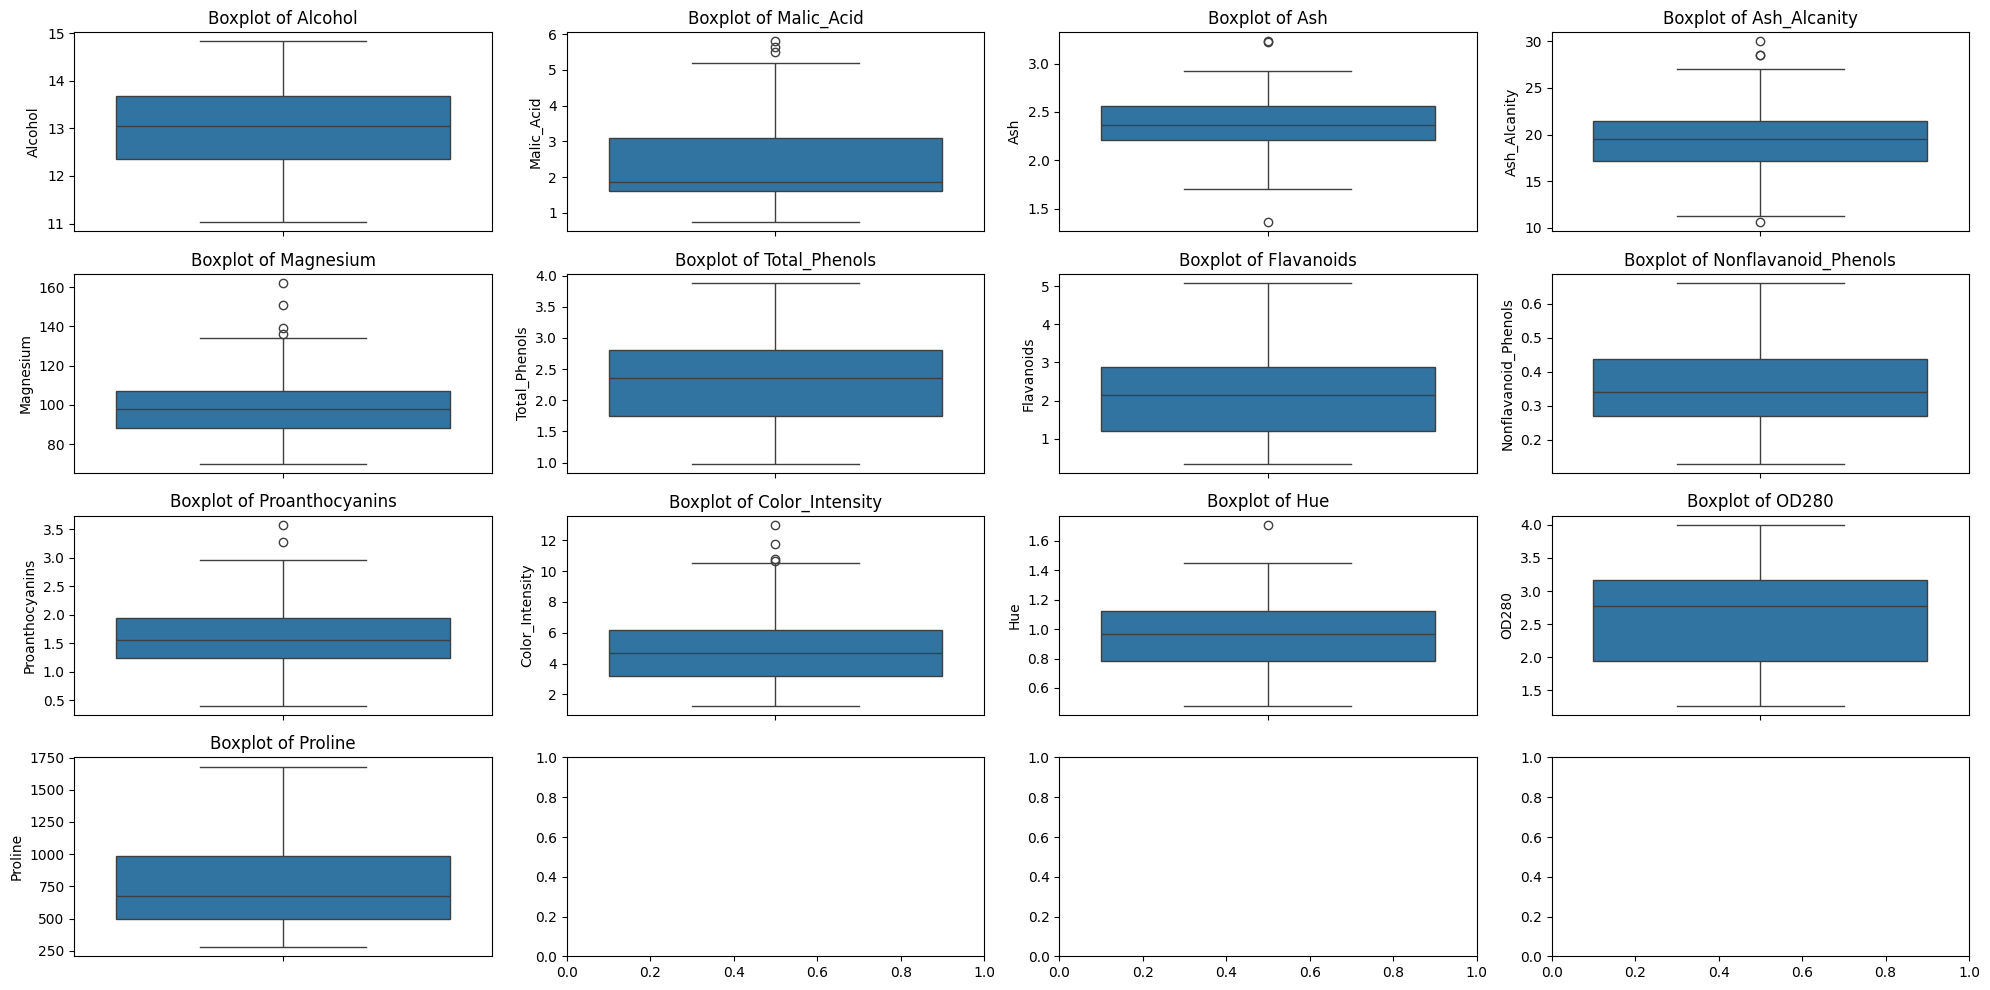

In [11]:
# Visualize

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 10)) # Create a figure and several axes

axes = axes.flatten() # Turn a 2D array into a 1D array for simplification

for i, col in enumerate(df.columns):
  # Create a histogram for all columns
  sns.boxplot(data=df, y=col, ax=axes[i])
  axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

We can see several features have outliers. We can handle it in `Feature Engineering` section.  

### Bivariate Analysis

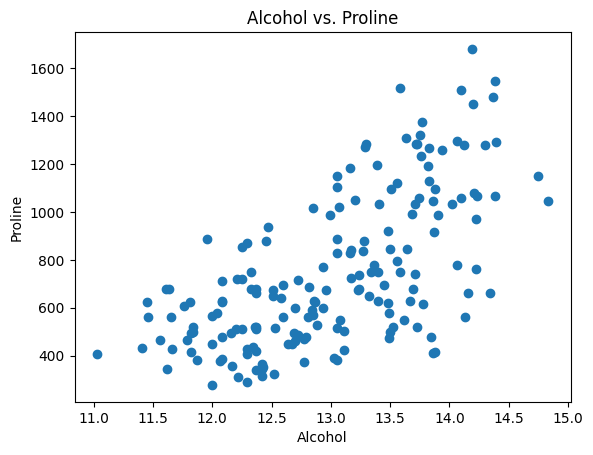

In [12]:
# Let's plot Alcohol vs. Proline in scatter plot
plt.scatter(df["Alcohol"], df["Proline"])
plt.title("Alcohol vs. Proline")
plt.xlabel("Alcohol")
plt.ylabel("Proline")
plt.show()

It shows that there is an almost linear relationship between Alcohol and Proline.

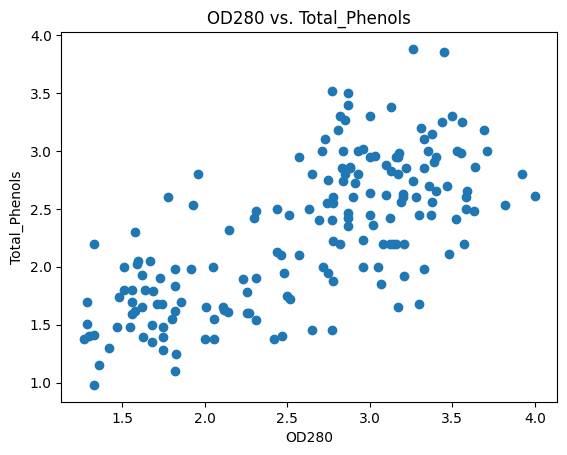

In [13]:
# Let's plot OD280 vs. Total_Phenols in scatter plot
plt.scatter(df["OD280"], df["Total_Phenols"])
plt.title("OD280 vs. Total_Phenols")
plt.xlabel("OD280")
plt.ylabel("Total_Phenols")
plt.show()

I think that it has the same correlation as before

### Multivariate Analysis

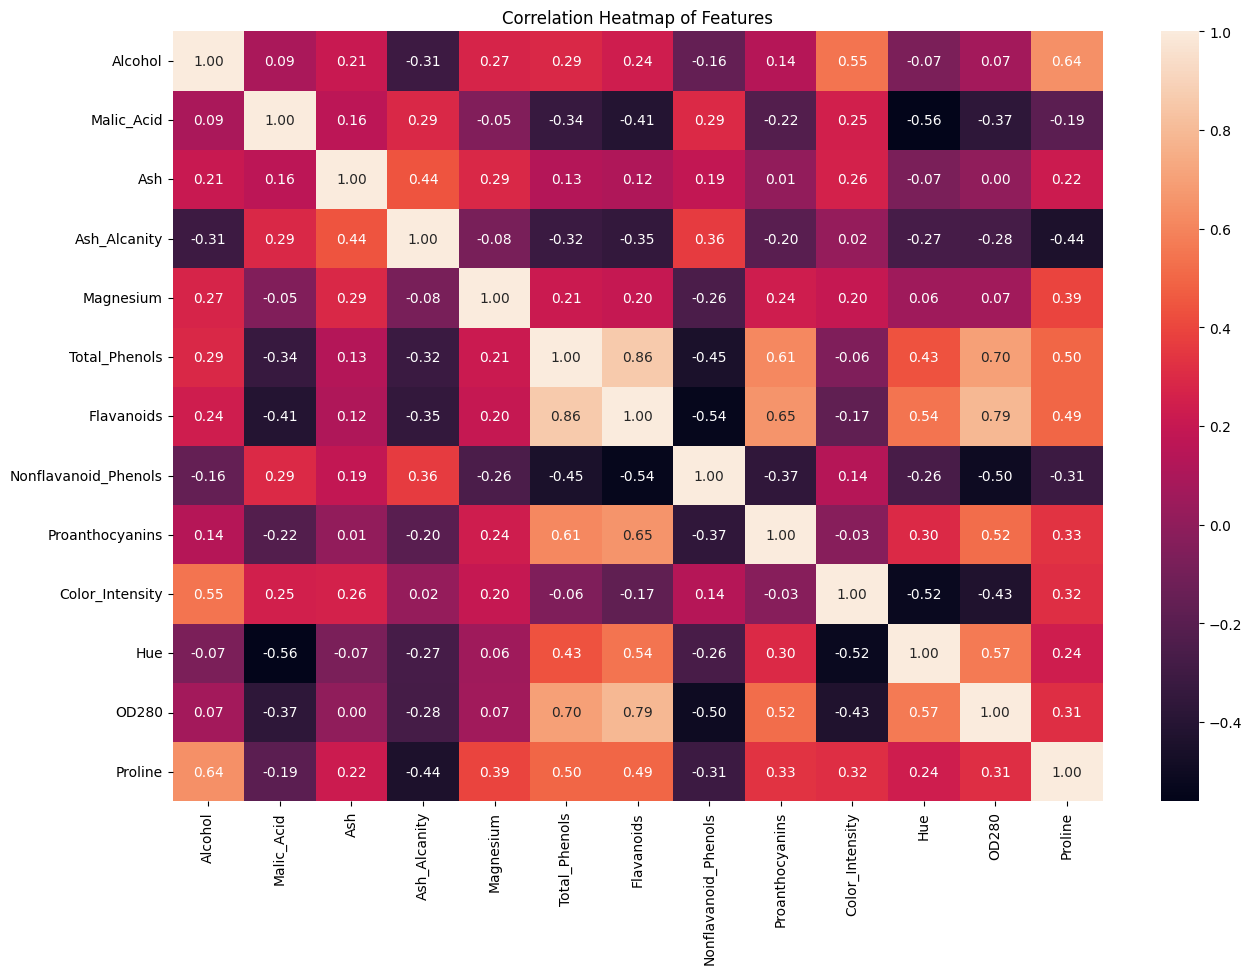

In [14]:
# Calculate the correlation
correlation_matrix = df.corr()

# Create a big figure
plt.figure(figsize=(15, 10))

# Plot them in a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")

plt.title('Correlation Heatmap of Features')
plt.show()

There are no strong correlation between most features. Except for, Flavanoids and Total_Phenols.

## Feature Engineering

In [15]:
# Handle outliers
features = ['Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
            'Proanthocyanins', 'Color_Intensity', 'Hue']

def find_outlier_boundary(df, variable):

    # Mencari batas atas dan batas bawah

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [16]:
for name in features:
  uper, lower =find_outlier_boundary(df, name)
  df[name]= np.where(df[name] > uper, uper, np.where(df[name] < lower, lower, df[name]))

In [17]:
df.shape

(178, 13)

In [18]:
# Feature Scalling
scaler = MinMaxScaler()

np_scaled = scaler.fit_transform(df) # It turns into a Numpy array

In [19]:
# Let's check it
np_scaled[:5]

array([[0.84210526, 0.21260274, 0.53327338, 0.28197674, 0.87022901,
        0.62758621, 0.57383966, 0.28301887, 0.72586873, 0.46432375,
        0.48854962, 0.97069597, 0.56134094],
       [0.57105263, 0.22794521, 0.32464029, 0.02616279, 0.45801527,
        0.57586207, 0.51054852, 0.24528302, 0.33590734, 0.33013845,
        0.49727372, 0.78021978, 0.55064194],
       [0.56052632, 0.35506849, 0.70593525, 0.45639535, 0.47328244,
        0.62758621, 0.61181435, 0.32075472, 0.92664093, 0.4685836 ,
        0.47982552, 0.6959707 , 0.64693295],
       [0.87894737, 0.26520548, 0.58363309, 0.35174419, 0.65648855,
        0.98965517, 0.66455696, 0.20754717, 0.68339768, 0.6943557 ,
        0.33151581, 0.7985348 , 0.85734665],
       [0.58157895, 0.40547945, 0.84982014, 0.59593023, 0.73282443,
        0.62758621, 0.49578059, 0.49056604, 0.54440154, 0.32374867,
        0.48854962, 0.60805861, 0.32596291]])

In [20]:
# Convert it into a DataFrame for better readability
df_scaled = pd.DataFrame(data=np_scaled, columns=df.columns)
df_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.212603,0.533273,0.281977,0.870229,0.627586,0.573840,0.283019,0.725869,0.464324,0.488550,0.970696,0.561341
1,0.571053,0.227945,0.324640,0.026163,0.458015,0.575862,0.510549,0.245283,0.335907,0.330138,0.497274,0.780220,0.550642
2,0.560526,0.355068,0.705935,0.456395,0.473282,0.627586,0.611814,0.320755,0.926641,0.468584,0.479826,0.695971,0.646933
3,0.878947,0.265205,0.583633,0.351744,0.656489,0.989655,0.664557,0.207547,0.683398,0.694356,0.331516,0.798535,0.857347
4,0.581579,0.405479,0.849820,0.595930,0.732824,0.627586,0.495781,0.490566,0.544402,0.323749,0.488550,0.608059,0.325963


In [21]:
df_scaled.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.348589,0.487749,0.507447,0.450124,0.453487,0.356386,0.437460,0.454080,0.400229,0.416121,0.491460,0.334446
std,0.213639,0.241134,0.189716,0.191149,0.204797,0.215811,0.210730,0.234818,0.215503,0.240775,0.198120,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.189041,0.375000,0.375000,0.274809,0.262931,0.182489,0.264151,0.324324,0.206603,0.263904,0.244505,0.158702
50%,0.531579,0.246575,0.482914,0.508721,0.427481,0.474138,0.378692,0.396226,0.442085,0.363152,0.423119,0.553114,0.282097
75%,0.696711,0.513425,0.625000,0.625000,0.564885,0.627586,0.534810,0.580189,0.594595,0.523962,0.558342,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dimensionality Reduction (PCA)

In [22]:
# Do PCA and calculate the variance
pca = PCA()
pca_data = pca.fit_transform(df_scaled)
explained_variance = pca.explained_variance_
total_explained_variance = explained_variance.sum()
explained_variance_ratios = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratios)

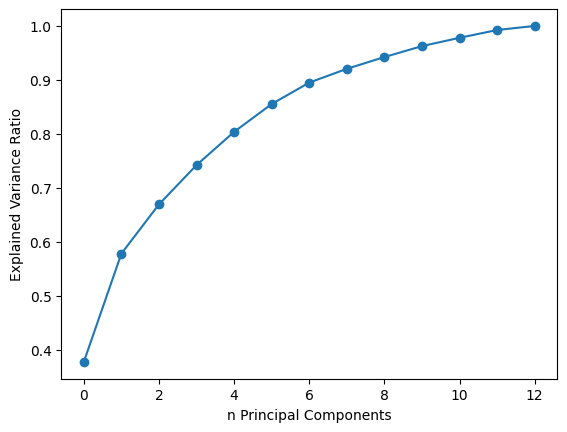

In [23]:
# Plotg a graph of the explained variance ratio
plt.plot(cumulative_variance_ratio, marker = 'o')
plt.xlabel('n Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

Maybe, there will be ~ 4 components.

In [24]:
df_scaled.shape

(178, 13)

In [25]:
# n_components = 3
pca_3 = PCA(n_components=3) # Set the hyperparameter
df_pca_3 = pd.DataFrame(data=pca_3.fit_transform(df_scaled),
                        columns=["Component_1", "Component_2", "Component_3"])
df_pca_3.head()

,Component_1,Component_2,Component_3
0,0.742378,0.334163,0.020734
1,0.488848,-0.022596,-0.370533
2,0.547607,0.244359,0.236458
3,0.809298,0.656370,0.026831
4,0.215145,0.140491,0.412441


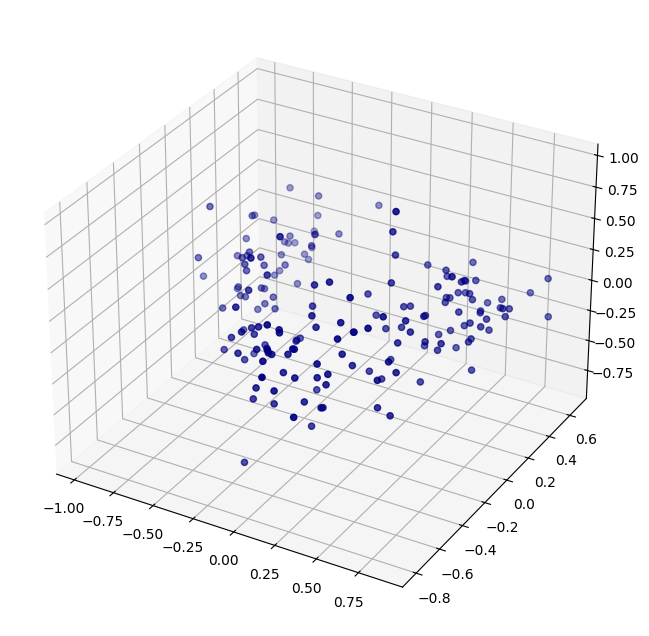

In [26]:
# Let's make it 3D
x = df_pca_3['Component_1']
y = df_pca_3['Component_2']
z = df_pca_3['Component_3']

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, c = 'navy', marker = 'o')
plt.show()

## K-Means Clustering

### Elbow Method

In [27]:
# Define the range of k values to test
k_values = range(1, 11)

inertia = []

np.random.seed(42)
# Calculate inertia for each k value. Loop over the k values and fit kmeans for each
for k in k_values:
    # initiate kmeans for each k value
    kmeans = KMeans(n_clusters=k, random_state=42)
    # fit kmeans for each k value
    kmeans.fit(df_pca_3)
    inertia.append(kmeans.inertia_)

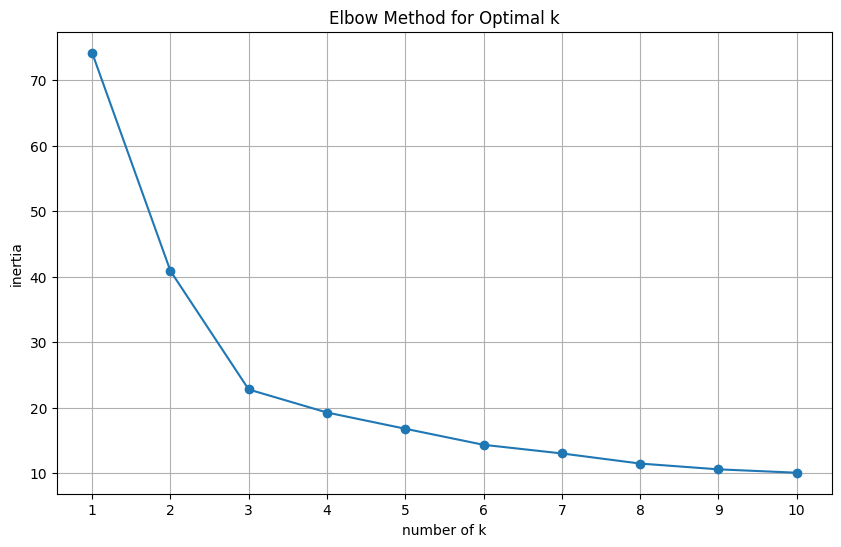

In [28]:
# Plot the elbow
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('number of k')
plt.ylabel('inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

3 - 4 clusters are better. Let's create 3 clusters

In [29]:
# Create some clusters
N_CLUSTERS=3 # Set the hyperparameter
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
kmeans.fit(df_pca_3)
kmeans_pred = kmeans.predict(df_pca_3)

In [30]:
# Assign to df_pca_3 and original dataset
df_pca_3["Cluster"] = kmeans_pred
df["Cluster"] = kmeans_pred

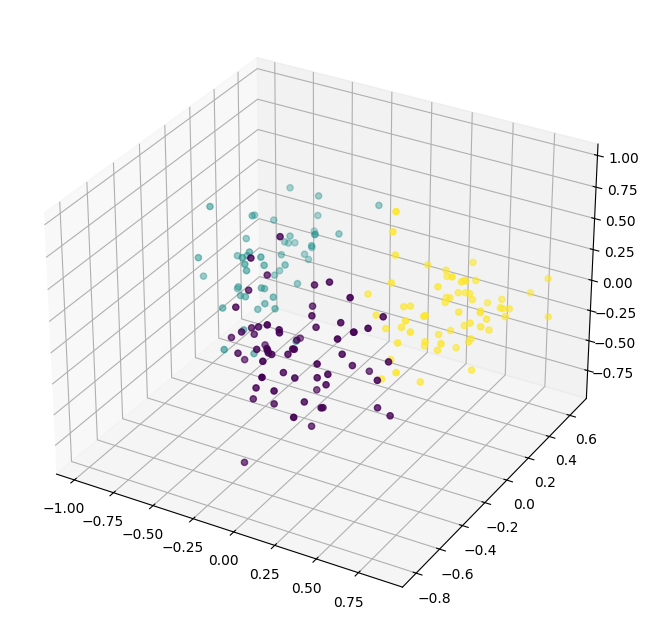

In [31]:
# Plot it again
x = df_pca_3['Component_1']
y = df_pca_3['Component_2']
z = df_pca_3['Component_3']

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, c = df["Cluster"], marker = 'o')
plt.show()

### Gap Statistic

In [32]:
def gap_statistic(data, n_clusters, n_refs=10, random_seed=42):
    """Calculate the gap statistic."""
    # Set the random seed
    np.random.seed(random_seed)

    # Fit KMeans to the original data
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_seed)
    kmeans.fit(data)
    original_inertia = kmeans.inertia_

    # Generate reference datasets and calculate their inertia
    reference_inertia = np.zeros(n_refs)
    for i in range(n_refs):
        refs = np.random.rand(data.shape[0], data.shape[1])  # Generate new random reference data for each ref
        kmeans.fit(refs)
        reference_inertia[i] = kmeans.inertia_

    # Compute the gap statistic
    gap = np.log(np.mean(reference_inertia)) - np.log(original_inertia)
    return gap

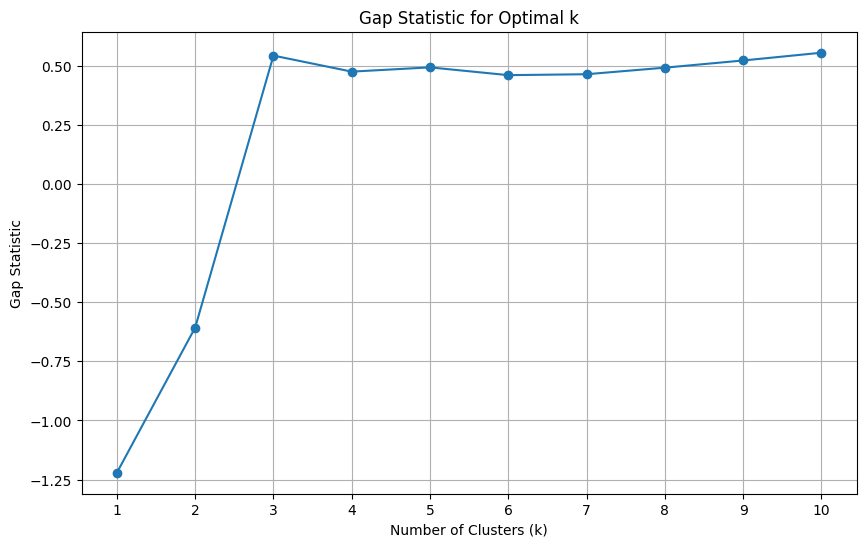

In [33]:
# Define k value range
k_values = range(1, 11)

gaps = []

# Compute gap statistics for each k
for k in k_values:
    # call function gap statistic
    gap = gap_statistic(data=df_pca_3, n_clusters=k, n_refs=10)
    # Append gap value
    gaps.append(gap)


# Plot the Gap Statistic
plt.figure(figsize=(10, 6))
plt.plot(k_values, gaps, marker='o')
plt.title('Gap Statistic for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Statistic')
plt.xticks(k_values)
plt.grid()
plt.show()

Based on the graph, 3 clusters might be optimal.

### Score Plot (Silhouette Score)

Average Silhouette Score for 3 clusters: 0.69



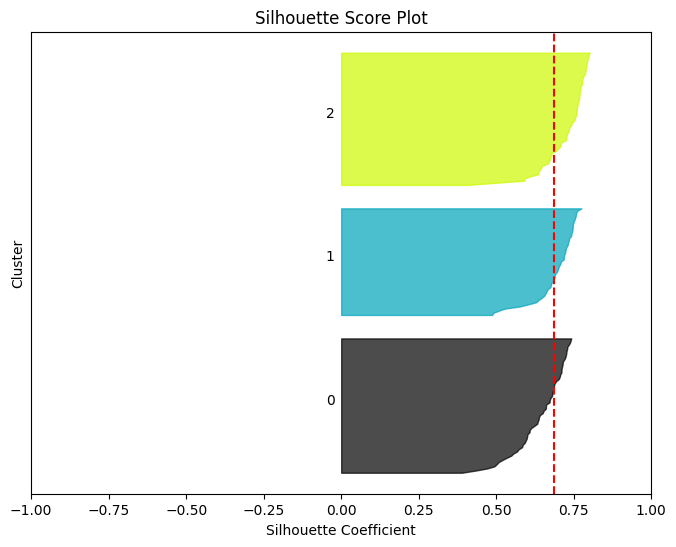

In [34]:
# Calculate the average silhouette score
silhouette_avg = silhouette_score(df_pca_3, kmeans_pred)
print(f"Average Silhouette Score for {N_CLUSTERS} clusters: {silhouette_avg:.2f}\n")

# Calculate silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df_pca_3, kmeans_pred)

# Plotting the Silhouette Score Plot
fig, ax = plt.subplots(figsize=(8, 6))
y_lower = 10

for i in range(N_CLUSTERS):
    # Aggregate the silhouette scores for samples in each cluster
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans_pred == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Fill the silhouette plot for each cluster
    color = plt.cm.nipy_spectral(float(i) / N_CLUSTERS)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10  # 10 for the space between plots

ax.set_title("Silhouette Score Plot")
ax.set_xlabel("Silhouette Coefficient")
ax.set_ylabel("Cluster")

# Draw a vertical line for the average silhouette score of all values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])  # Clear the y-axis labels/ticks
ax.set_xlim([-1, 1])

plt.show()

The silhouette score for 3 clusters shows an average that is good enough.

In [35]:

uci_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
uci_data = pd.read_csv(uci_url, header=None)

y_uci = uci_data.iloc[:, 0]
X_uci = uci_data.iloc[:, 1:]


In [36]:
X_uci.head()
#hmm... no label

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [37]:
type(y_uci)

pandas.core.series.Series

In [38]:
y_uci.head()

,0
0,1
1,1
2,1
3,1
4,1


In [39]:
df_pca_3.shape
# kok rownya beda??

(178, 4)

In [40]:
X_uci.shape

(178, 13)

In [41]:
# from the experiments above we can see that the n_cluster=3 is the best option for clustering algorithm
# we can use pca dataset.
from sklearn.cluster import KMeans

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_pca_3)

KMeans(n_clusters=3)

In [42]:
print("Cluster membership:\n{}".format(kmeans.labels_))

Cluster membership:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [48]:
# y_uci.to_list()
from sklearn.cluster import KMeans

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_scaled)

KMeans(n_clusters=3)

In [49]:
print("Cluster membership:\n{}".format(kmeans.labels_))

Cluster membership:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [52]:
print(y_uci.to_list())

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [53]:
new_kmean = []
for n in kmeans.labels_:
  if n == 0:
    new_kmean.append(1)
  elif n == 1:
    new_kmean.append(2)
  elif n == 2:
    new_kmean.append(3)

In [55]:
print(new_kmean)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [60]:
from sklearn.metrics import accuracy_score

y_target = y_uci.to_list()

accuracy_score(y_target, new_kmean)

0.9662921348314607